# 코퍼스 테스트 (메뉴판닷컴 + 만개100p) 3303 

In [1]:
# coding: utf-8
from __future__ import unicode_literals
import os
from konlpy.tag import Twitter
import codecs
import pickle

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
os.getcwd()

'/root/nlp'

In [4]:
def read_data(filename):
    with codecs.open(filename,'r',encoding='utf8') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
      #  data = data[1:]   # header 제외
    return data

In [5]:
filename = 'recipeCorpus2.txt'
train_data = read_data(filename)


In [6]:
print len(train_data)      # nrows: 150000
print len(train_data[0])   # ncols: 3

11704
3


In [7]:
pos_tagger = Twitter()

In [8]:
def tokenize(doc):
    # norm, stem은 optional
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [ ]:
train_docs = [(tokenize(row[1])) for row in train_data]

In [15]:
from konlpy.utils import pprint

In [16]:
pprint(train_docs[0])

[쌀/Noun,
 을/Josa,
 씻다/Verb,
 분/Noun,
 정도/Noun,
 물/Noun,
 에/Josa,
 불다/Verb,
 두다/Verb,
 멥쌀/Noun,
 과/Josa,
 찹쌀/Noun,
 을/Josa,
 의/Noun,
 비율/Noun,
 로/Josa,
 사용/Noun,
 하다/Verb,
 좋다/Adjective,
 뚱이랑뚱/Noun,
 현미/Noun,
 랑/Josa,
 적미/Noun,
 랑/Josa,
 흑/Adverb,
 밉다/Adjective,
 섞다/Verb,
 더/Noun,
 예쁘다/Adjective,
 작다/Adjective,
 뭉치/Noun,
 쌀/Noun,
 을/Josa,
 씻다/Verb,
 분/Noun,
 정도/Noun,
 물/Noun,
 에/Josa,
 불다/Verb,
 두다/Verb,
 개/Noun,
 은행/Noun,
 은/Josa,
 볶다/Verb,
 껍질/Noun,
 을/Josa,
 벗기다/Verb,
 불/Noun,
 을/Josa,
 중약/Noun,
 불로/Noun,
 줄이다/Verb,
 물엿/Noun,
 이나/Josa,
 올리고당/Noun,
 을/Josa,
 수저/Noun,
 넣다/Verb,
 같이/Josa,
 볶다/Verb,
 껍질/Noun,
 이/Josa,
 쉬다/Verb,
 벗기다/Verb,
 지다/Verb,
 그린/Noun,
 씨엘/Noun,
 끓다/Verb,
 물/Noun,
 에/Josa,
 데/Noun,
 치다/Verb,
 국자/Noun,
 를/Josa,
 둥글다/Adjective,
 밀다/Verb,
 껍질/Noun,
 이/Josa,
 벗기다/Verb,
 기름기/Noun,
 없다/Adjective,
 은행/Noun,
 이/Josa,
 되다/Verb,
 밥/Noun,
 심다/Verb,
 국력/Noun,
 볶다/Verb,
 물엿/Noun,
 을/Josa,
 조금/Noun,
 넣다/Verb,
 주걱/Noun,
 이나/Josa,
 숫/Noun,
 가락/Noun,
 등/Noun,
 으로/Josa,
 저/Determine

In [17]:
tokens = [t for d in train_docs for t in d[0]]
print len(tokens)

26085


In [18]:
import nltk
text = nltk.Text(tokens, name='NMSC')
print text

<Text: NMSC>


In [65]:
pprint(text.tokens[500])

어


In [19]:
print len(text.tokens)                 # returns number of tokens

26085


In [20]:
print len(set(text.tokens))         # returns number of unique tokens

542


In [21]:
pprint(text.vocab().most_common(10))    # returns frequency distribution

[(/, 3401),
 (n, 3085),
 (o, 3070),
 (N, 3057),
 (u, 3057),
 (e, 497),
 (다, 332),
 (고, 290),
 (기, 227),
 (r, 213)]


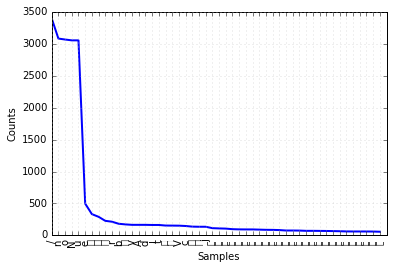

In [23]:
text.plot(50)     # Plot sorted frequency of top 50 tokens

In [28]:
from gensim.models import Word2Vec

In [35]:
word_model = Word2Vec(train_docs, size=100, window=5, min_count=5, workers=4)
word_model.init_sims(replace=True)
word_model.save('test1.model')

In [66]:
pprint(train_docs[1])

[다시마/Noun,
 는/Josa,
 마르다/Adjective,
 행주/Noun,
 로/Josa,
 닦다/Verb,
 후/Noun,
 냄비/Noun,
 바닥/Noun,
 에/Josa,
 까다/Verb,
 쌀/Noun,
 을/Josa,
 넣다/Verb,
 고/Noun,
 슬하/Noun,
 게/Josa,
 밥/Noun,
 을/Josa,
 짓다/Verb,
 다시마/Noun,
 를/Josa,
 빼/Noun,
 내다/Verb,
 후/Noun,
 분량/Noun,
 의/Josa,
 배합/Noun,
 초/Noun,
 를/Josa,
 넣다/Verb,
 버/Noun,
 무려/Noun,
 식히다/Verb,
 묵다/Verb,
 쌀/Noun,
 로/Josa,
 하다/Verb,
 때/Noun,
 는/Josa,
 식초/Noun,
 몇/NounPrefix,
 방울/Noun,
 을/Josa,
 떨어트려/Noun,
 넣다/Verb,
 잡/Noun,
 냄새/Noun,
 가/Josa,
 없다/Adjective,
 밥맛/Noun,
 이/Josa,
 좋다/Adjective,
 수빵/Noun,
 방방/Adverb,
 다시다/Noun,
 를/Josa,
 넣다/Verb,
 이유/Noun,
 는/Josa,
 향/Noun,
 때문/Noun,
 인가/Josa,
 암튼/Adverb,
 뭐/Noun,
 든/Josa,
 밥/Noun,
 이/Josa,
 맛있다/Adjective,
 되다/Verb,
 대동/Noun,
 최고/Noun,
 다시마/Noun,
 는/Josa,
 마른행주/Noun,
 로/Josa,
 닦다/Verb,
 표면/Noun,
 에/Josa,
 먼지/Noun,
 가/Josa,
 제거/Noun,
 가/Josa,
 돼다/Verb,
 싶다/Verb,
 정도/Noun,
 로/Josa,
 닦다/Verb,
 신/Noun,
 승순/Noun,
 개/Noun,
 볼/Noun,
 에/Josa,
 계란/Noun,
 을/Josa,
 풀/Noun,
 고/Josa,
 소금/Noun,
 간/Suffix,
 을/Josa,
 하다/V

In [71]:
pprint(model.most_similar('사이다/Noun'))

[(당/Noun, 0.8050065040588379),
 (레몬쥬스/Noun, 0.8030404448509216),
 (원/Suffix, 0.7921150326728821),
 (멸치액젓/Noun, 0.7812657952308655),
 (오미자/Noun, 0.7683328986167908),
 (까나리/Noun, 0.7666820287704468),
 (쥬스/Noun, 0.7637406587600708),
 (자신감/Noun, 0.7601253986358643),
 (매운탕/Noun, 0.757141649723053),
 (탄산수/Noun, 0.7565250992774963)]


In [55]:
model['멸치/Noun']

array([-0.52882451, -0.31584057, -1.53171444,  0.31637236, -0.8896156 ,
       -0.74884295,  0.90856367, -0.9935959 , -0.36992064, -0.17746501,
       -1.15707505, -0.08172133, -0.21895579, -0.9379732 ,  1.61794138,
       -0.62538892,  1.21244645,  1.27052057,  1.03638637,  2.4698441 ,
       -1.56574047, -0.70262021, -0.0109958 ,  0.70686501, -1.41213787,
        0.42041582, -0.4588919 , -0.09952041,  0.34152344,  0.22312112,
       -1.13519502,  0.56443173, -0.51184899,  0.7961207 ,  0.07986227,
        1.3644594 ,  1.16530514, -1.01315224,  0.35221642, -0.50739288,
       -0.50289994, -0.01515391, -0.74946594,  1.63668001, -0.87670475,
        1.56522536,  0.31227812,  0.92214471,  0.40564302,  0.23607698,
        0.41683674,  0.63558227, -0.02958273,  0.78238028, -0.51369739,
       -1.12873995,  0.17478849, -0.39533615, -0.77111322,  0.2596125 ,
       -0.41353616, -1.00086653, -1.02964485,  2.04160905, -0.40819407,
       -0.15278411,  1.25621295,  1.14618301,  0.38268837, -0.05

In [73]:
word_vectorizer = Word2Vec.load('test1.model')

In [74]:
word_vectorizer